In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0, 50,  501)
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [3]:
y = np.sin(x)
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

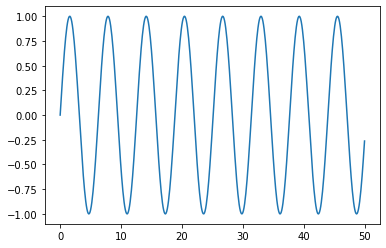

In [4]:
plt.plot(x, y)

In [5]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [6]:
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [7]:
len(df)

501

In [8]:
testPercent = 0.2

In [9]:
len(df) * testPercent

100.2

In [48]:
trainDf = df.iloc[:400]
testDf = df.iloc[400:]

In [49]:
testDf

,Sine
40.0,0.745113
40.1,0.674808
40.2,0.597760
40.3,0.514740
40.4,0.426577
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [56]:
trainDf

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
39.5,0.973645
39.6,0.946013
39.7,0.908927
39.8,0.862761


In [10]:
train = df.iloc[:400]
test = df.iloc[400:]

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(train)

MinMaxScaler()

In [14]:
train = scaler.transform(train)
test = scaler.transform(test)

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
generator = TimeseriesGenerator(train, train, length=2, batch_size=1)

In [17]:
generator

In [18]:
X, y = generator[0]

In [19]:
X

array([[[0.49999912],
        [0.54991622]]])

In [20]:
y

array([[0.59933458]])

In [21]:
generator = TimeseriesGenerator(train, train, length=50, batch_size=1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

In [32]:
length = 50
nFeatures = 1

In [23]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(50, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(generator, epochs=5)

Epoch 1/5
350/350 [==============================] - 4s 8ms/step - loss: 0.0053
Epoch 2/5
350/350 [==============================] - 3s 8ms/step - loss: 1.1165e-04
Epoch 3/5
350/350 [==============================] - 3s 8ms/step - loss: 0.0015
Epoch 4/5
350/350 [==============================] - 4s 10ms/step - loss: 1.5269e-05
Epoch 5/5
350/350 [==============================] - 4s 11ms/step - loss: 4.3867e-06


In [26]:
model.history.history

{'loss': [0.005273457150906324,
  0.00011164956958964467,
  0.0014656821731477976,
  1.5269491996150464e-05,
  4.386653927213047e-06]}

In [27]:
lossDf = pd.DataFrame(model.history.history)
lossDf.head()

,loss
0,0.005273
1,0.000112
2,0.001466
3,0.000015
4,0.000004


<AxesSubplot:>

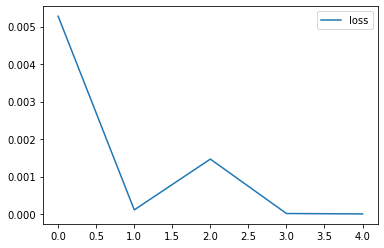

In [28]:
lossDf.plot()

In [29]:
firstBatch = train[-50:]

In [30]:
firstBatch.shape

(50, 1)

In [31]:
firstBatch

array([[2.85906063e-01],
       [2.41865934e-01],
       [2.00404987e-01],
       [1.61937485e-01],
       [1.26847783e-01],
       [9.54864865e-02],
       [6.81669460e-02],
       [4.51621298e-02],
       [2.67018944e-02],
       [1.29706884e-02],
       [4.10570950e-03],
       [1.95533568e-04],
       [1.27922981e-03],
       [7.34597031e-03],
       [1.83351382e-02],
       [3.41369333e-02],
       [5.45934694e-02],
       [7.95003514e-02],
       [1.08608718e-01],
       [1.41627728e-01],
       [1.78227467e-01],
       [2.18042242e-01],
       [2.60674236e-01],
       [3.05697486e-01],
       [3.52662133e-01],
       [4.01098922e-01],
       [4.50523890e-01],
       [5.00443198e-01],
       [5.50358069e-01],
       [5.99769769e-01],
       [6.48184595e-01],
       [6.95118799e-01],
       [7.40103433e-01],
       [7.82689024e-01],
       [8.22450070e-01],
       [8.58989293e-01],
       [8.91941605e-01],
       [9.20977757e-01],
       [9.45807630e-01],
       [9.66183132e-01],


In [34]:
firstBatch = firstBatch.reshape(1, length, nFeatures)

In [35]:
model.predict(firstBatch)

array([[0.87132436]], dtype=float32)

In [36]:
testPredictions = []

firstBatch = train[-length:]
currentBatch = firstBatch.reshape(1, length, nFeatures)

In [39]:
currentBatch.shape

(1, 50, 1)

In [40]:
currentBatch

array([[[2.85906063e-01],
        [2.41865934e-01],
        [2.00404987e-01],
        [1.61937485e-01],
        [1.26847783e-01],
        [9.54864865e-02],
        [6.81669460e-02],
        [4.51621298e-02],
        [2.67018944e-02],
        [1.29706884e-02],
        [4.10570950e-03],
        [1.95533568e-04],
        [1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.4

In [42]:
for i in range(len(test)):
    currentPrediction = model.predict(currentBatch)[0]
    testPredictions.append(currentPrediction)
    currentBatch = np.append(currentBatch[:, 1:, :], [[currentPrediction]], axis=1)

In [43]:
testPredictions

[array([0.87132436], dtype=float32),
 array([0.8359309], dtype=float32),
 array([0.7974416], dtype=float32),
 array([0.7559202], dtype=float32),
 array([0.71200544], dtype=float32),
 array([0.66656065], dtype=float32),
 array([0.61999077], dtype=float32),
 array([0.57201284], dtype=float32),
 array([0.52328825], dtype=float32),
 array([0.47443673], dtype=float32),
 array([0.4257109], dtype=float32),
 array([0.37733003], dtype=float32),
 array([0.32987306], dtype=float32),
 array([0.2839929], dtype=float32),
 array([0.23993422], dtype=float32),
 array([0.19835758], dtype=float32),
 array([0.15950507], dtype=float32),
 array([0.12429853], dtype=float32),
 array([0.09299636], dtype=float32),
 array([0.06617223], dtype=float32),
 array([0.04401426], dtype=float32),
 array([0.02691663], dtype=float32),
 array([0.01520251], dtype=float32),
 array([0.00861847], dtype=float32),
 array([0.00723084], dtype=float32),
 array([0.01077084], dtype=float32),
 array([0.01945416], dtype=float32),
 array

In [44]:
test

array([[8.72558686e-01],
       [8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],


In [45]:
truePredictions = scaler.inverse_transform(testPredictions)

In [46]:
truePredictions

array([[ 0.74264453],
       [ 0.67185814],
       [ 0.5948802 ],
       [ 0.511838  ],
       [ 0.42400924],
       [ 0.33312039],
       [ 0.23998137],
       [ 0.1440263 ],
       [ 0.04657789],
       [-0.05112436],
       [-0.14857527],
       [-0.24533619],
       [-0.34024939],
       [-0.43200899],
       [-0.52012562],
       [-0.60327823],
       [-0.68098263],
       [-0.75139515],
       [-0.81399898],
       [-0.8676468 ],
       [-0.9119624 ],
       [-0.94615737],
       [-0.96958543],
       [-0.98275341],
       [-0.98552864],
       [-0.9784487 ],
       [-0.96108219],
       [-0.93410709],
       [-0.8986618 ],
       [-0.8545799 ],
       [-0.80197134],
       [-0.74132064],
       [-0.67446891],
       [-0.60049373],
       [-0.52023606],
       [-0.43448531],
       [-0.34487742],
       [-0.25153854],
       [-0.15507301],
       [-0.05718277],
       [ 0.04096759],
       [ 0.13797945],
       [ 0.23395062],
       [ 0.32734141],
       [ 0.41693255],
       [ 0

In [47]:
test

array([[8.72558686e-01],
       [8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],


In [52]:
testDf

,Sine
40.0,0.745113
40.1,0.674808
40.2,0.597760
40.3,0.514740
40.4,0.426577
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [53]:
testDf['Predictions'] = truePredictions

<ipython-input-53-58e9d7835d4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testDf['Predictions'] = truePredictions


In [54]:
testDf

,Sine,Predictions
40.0,0.745113,0.742645
40.1,0.674808,0.671858
40.2,0.597760,0.594880
40.3,0.514740,0.511838
40.4,0.426577,0.424009
...,...,...
49.6,-0.617439,-0.562901
49.7,-0.535823,-0.481588
49.8,-0.448854,-0.396366
49.9,-0.357400,-0.306647


<AxesSubplot:>

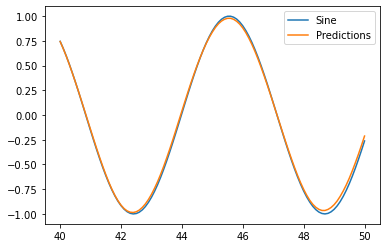

In [55]:
testDf.plot()

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
earlyStop = EarlyStopping(patience=2)

In [59]:
length = 40

generator = TimeseriesGenerator(train, train, length=length, batch_size=1)

testGenerator = TimeseriesGenerator(test, test, length=length, batch_size=1)

In [60]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [61]:
model.fit(generator, epochs=30, validation_data=testGenerator, callbacks=[earlyStop])

Epoch 1/30
360/360 [==============================] - 10s 20ms/step - loss: 0.0096 - val_loss: 7.2581e-05
Epoch 2/30
360/360 [==============================] - 7s 19ms/step - loss: 1.2319e-04 - val_loss: 9.9379e-05
Epoch 3/30
360/360 [==============================] - 7s 20ms/step - loss: 1.1660e-04 - val_loss: 4.6315e-05
Epoch 4/30
360/360 [==============================] - 7s 19ms/step - loss: 9.5021e-05 - val_loss: 5.2833e-04
Epoch 5/30
360/360 [==============================] - 7s 21ms/step - loss: 1.8236e-04 - val_loss: 1.8951e-05
Epoch 6/30
360/360 [==============================] - 7s 20ms/step - loss: 3.0223e-04 - val_loss: 8.9436e-05
Epoch 7/30
360/360 [==============================] - 8s 22ms/step - loss: 2.0925e-04 - val_loss: 2.5878e-05


In [63]:
testPredictions = []
firstBatch = train[-length:]
currentBatch = firstBatch.reshape(1, length, nFeatures)

for i in range(len(test)):
    currentPrediction = model.predict(currentBatch)[0]
    testPredictions.append(currentPrediction)
    currentBatch = np.append(currentBatch[:, 1:, :], [[currentPrediction]], axis=1)
    
truePredictions = scaler.inverse_transform(testPredictions)
testDf['LSTM Predictions'] = truePredictions

testDf

<ipython-input-63-a3a1c78e979f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testDf['LSTM Predictions'] = truePredictions


,Sine,Predictions,LSTM Predictions
40.0,0.745113,0.742645,0.753473
40.1,0.674808,0.671858,0.687154
40.2,0.597760,0.594880,0.614730
40.3,0.514740,0.511838,0.536766
40.4,0.426577,0.424009,0.453887
...,...,...,...
49.6,-0.617439,-0.562901,-0.599764
49.7,-0.535823,-0.481588,-0.536857
49.8,-0.448854,-0.396366,-0.469146
49.9,-0.357400,-0.306647,-0.397216


<AxesSubplot:>

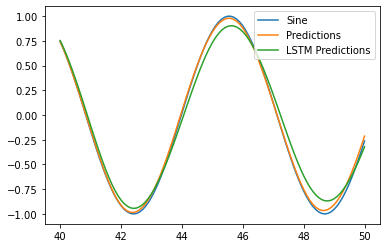

In [64]:
testDf.plot()